In [12]:
import time 

import matplotlib.pyplot as plt 

import qcodes
from qcodes.instrument_drivers.stanford_research.SR860 import SR860

In [7]:
sr = SR860("sr", "GPIB0::4::INSTR")

Connected to: Stanford_Research_Systems SR860 (serial:003101, firmware:V1.47) in 0.08s


In [5]:
sr.buffer.capture_config("X,Y")
data = sr.buffer.capture_samples(100)

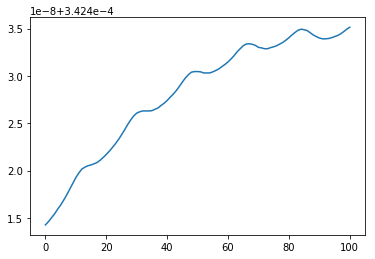

In [6]:
plt.plot(data["X"])
plt.show()

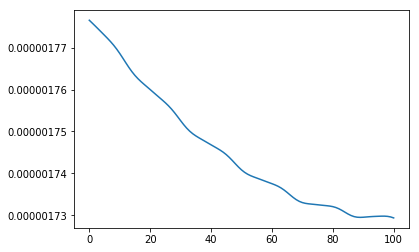

In [7]:
plt.plot(data["Y"])
plt.show()

# Lets capture by sending triggers. We use the Yokogawa GS200 to send triggers, which is not yet in the main branch. Nevertheless, it should be clear from the example how the capturing works

In [3]:
from qcodes.instrument_drivers.yokogawa.GS200 import GS200
yo = GS200("yo", "USB0::0x0B21::0x0039::91T926459::INSTR")

Connected to: YOKOGAWA GS210 (serial:91T926459, firmware:2.02) in 0.04s


In [13]:
def send_trigger(): 
    yo.voltage(5.0)
    time.sleep(0.01)
    yo.voltage(0.0)

In [10]:
def setup():
    yo.auto_range(True)
    yo.output("on")
    yo.voltage(0.0)

In [14]:
n_samples = 100

setup()
sr.buffer.start_capture("ONE", "SAMP")

for _ in range(n_samples): 
    send_trigger()

sr.buffer.stop_capture()

data = sr.buffer.read_capture_data(n_samples)

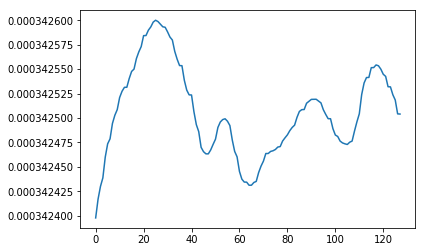

In [15]:
plt.plot(data["X"])
plt.show()